Binning is a technique for data smoothing which is used to remove noise from the data.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic
import jenkspy

In [2]:
#Loading the dataset
data = pd.read_csv("D:\\SLIIT\\3rd year 2nd sem\\Fundamentals of Data Mining\\Coding\\Cupcakes.csv")
data.head()

,Mese,Cupcake
0,2004-01,5
1,2004-02,5
2,2004-03,4
3,2004-04,6
4,2004-05,5


# Exploring the dataset

In [3]:
#Exploring the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Mese     204 non-null    object
 1   Cupcake  204 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


In [4]:
#Checking for values
data.isnull()

,Mese,Cupcake
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
199,False,False
200,False,False
201,False,False
202,False,False


In [5]:
data.describe()

,Cupcake
count,204.000000
mean,49.661765
std,28.192482
min,4.000000
25%,25.000000
50%,50.000000
75%,73.000000
max,100.000000


# Binning by Distance

In [6]:
min_value = data['Cupcake'].min()
max_value = data['Cupcake'].max()
print(min_value)
print(max_value)

4
100


**linspace() is used to calculate 4 bins equally distributed. Returns evenly spaced samples over a distribution**

In [7]:
#Calculating range of each interval.linspace() is used to calculate 4 bins equally distributed
bins = np.linspace(min_value,max_value,4)
bins

array([  4.,  36.,  68., 100.])

In [8]:
labels=['small','medium','big']

**Use cut when you need to segment the data into bins.**

In [10]:
#The Cut function converts the numerical values to categorical values
data['bin_cut_linspace'] = pd.cut(data['Cupcake'],bins=bins, labels=labels, include_lowest = True)

**hist() plots pre-computed bins and counts**

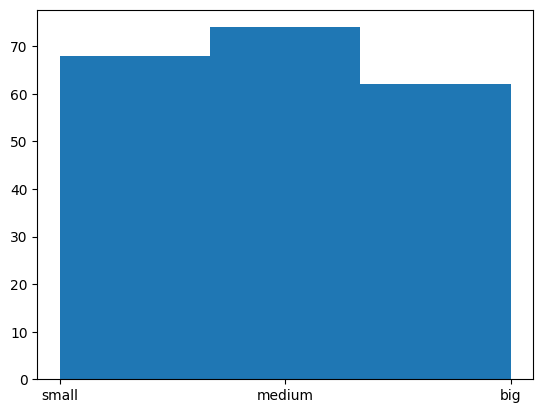

In [11]:
plt.hist(data['bin_cut_linspace'], bins=3)
plt.show()

In [12]:
#Setting the edges of the bins manually
bins = [0,10,50,100]
data['bin_cut_manual'] = pd.cut(data['Cupcake'],bins=bins,labels=labels,include_lowest=True)

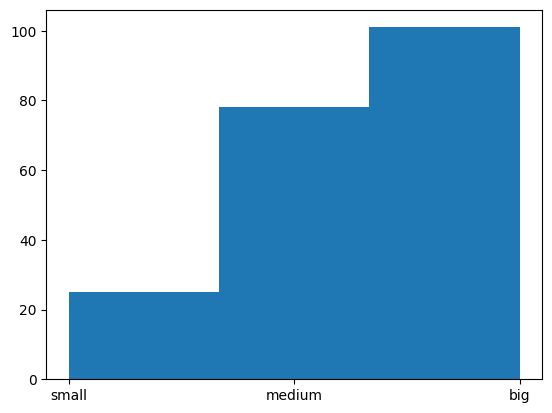

In [13]:
plt.hist(data['bin_cut_manual'],bins=3)
plt.show()

# Binning by Frequency 
**qcut() discretize variables into equal-size buckets based on rank or based on sample quantiles**

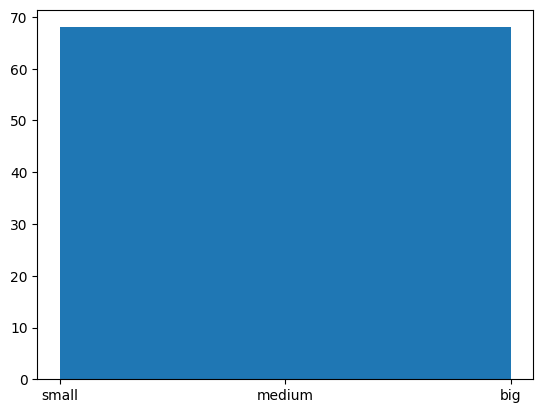

In [20]:
data['bin_qcut'] = pd.qcut(data['Cupcake'], q=3, precision=1, labels=labels)
plt.hist(data['bin_qcut'],bins=3)
plt.show()

# Sampling

In [24]:
x_data = np.arange(0, len(data))
y_data = data['Cupcake']
x_bins,bin_edges,misc = binned_statistic(y_data,x_data, statistic="mean",bins=2)
bin_edges

array([  4.,  52., 100.])

In [25]:
bin_intervals = pd.IntervalIndex.from_arrays(bin_edges[:-1],bin_edges[1:])

In [27]:
def set_to_median(x,bin_intervals):
    for interval in bin_intervals:
        if x in interval:
            return interval.mid

In [28]:
data['sampled_cupcake'] = data['Cupcake'].apply(lambda x:set_to_median(x, bin_intervals))

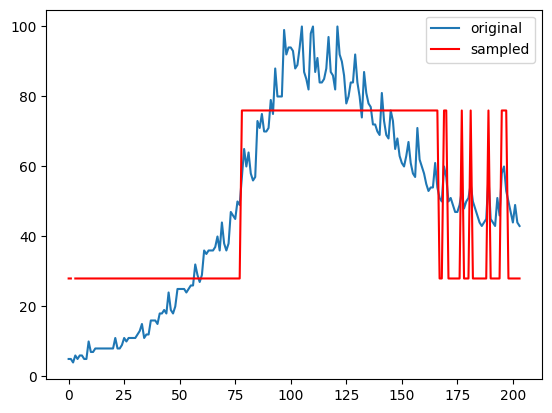

In [29]:
plt.plot(data['Cupcake'],label='original')
plt.plot(data['sampled_cupcake'],color='red',label='sampled')
plt.legend()
plt.show()

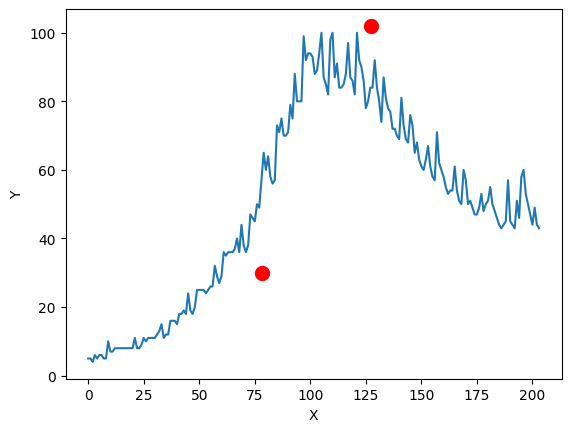

In [30]:
y_bins = (bin_edges[:-1] + bin_edges[1:]/2)
plt.plot(x_data,y_data)
plt.xlabel("X")
plt.ylabel("Y")

plt.scatter(x_bins,y_bins, color='red', linewidth=5)
plt.show()

# Calculating the natural breaks in the data

Natural breaks is the best way to split up ranges. Best ranges imply the ranges where like areas are grouped together. This method is used best with data that is unevenly distributed but not skewed towards either end of the distribution.

In [36]:
breaks = jenkspy.jenks_breaks(data['Cupcake'], n_classes=3)
print(breaks)

[4, 32, 65, 100]


In [38]:
data['cut_bin_break'] = pd.cut(data['Cupcake'], bins=breaks, labels=labels, include_lowest=True)

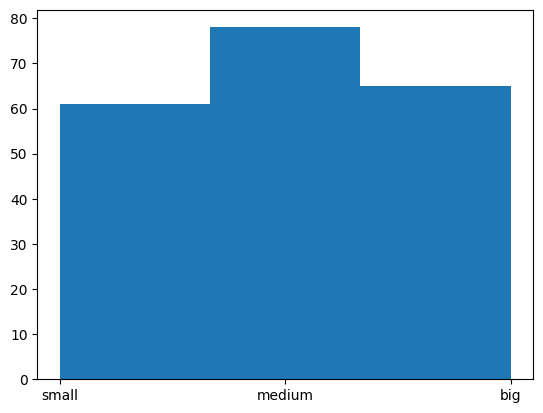

In [39]:
plt.hist(data['cut_bin_break'],bins=3)
plt.show()

In [40]:
data

,Mese,Cupcake,bin_cut_linspace,bin_cut_manual,bin_qcut,sampled_cupcake,cut_bin_break
0,2004-01,5,small,small,small,28.0,small
1,2004-02,5,small,small,small,28.0,small
2,2004-03,4,small,small,small,NaN,small
3,2004-04,6,small,small,small,28.0,small
4,2004-05,5,small,small,small,28.0,small
...,...,...,...,...,...,...,...
199,2020-08,47,medium,medium,medium,28.0,medium
200,2020-09,44,medium,medium,medium,28.0,medium
201,2020-10,49,medium,medium,medium,28.0,medium
202,2020-11,44,medium,medium,medium,28.0,medium
